### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [4]:
# Loading the dataset
data = pd.read_csv("language_detection.csv")

In [5]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [6]:
# value count for each language
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [7]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [8]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Text preprocessing

In [9]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

### Bag of Words

In [10]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [12]:
X.shape

(10337, 39404)

### Train Test split

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Model creation and Prediction

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [15]:
# prediction 
y_pred = model.predict(x_test)

### Evaluating the model

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [17]:
print("Accuracy is :",ac)

Accuracy is : 0.97678916827853


In [18]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      0.91      0.95        81
           2       1.00      0.99      1.00       102
           3       0.89      1.00      0.94       259
           4       0.98      1.00      0.99       186
           5       1.00      0.99      1.00       109
           6       1.00      0.99      0.99        74
           7       1.00      0.92      0.96        13
           8       1.00      0.99      1.00       131
           9       1.00      0.91      0.96        70
          10       0.99      0.98      0.98       121
          11       0.99      0.99      0.99       143
          12       1.00      0.96      0.98       142
          13       0.99      0.96      0.98       189
          14       0.96      0.98      0.97       139
          15       1.00      0.97      0.98       101
          16       1.00      0.95      0.97        98

    accuracy              

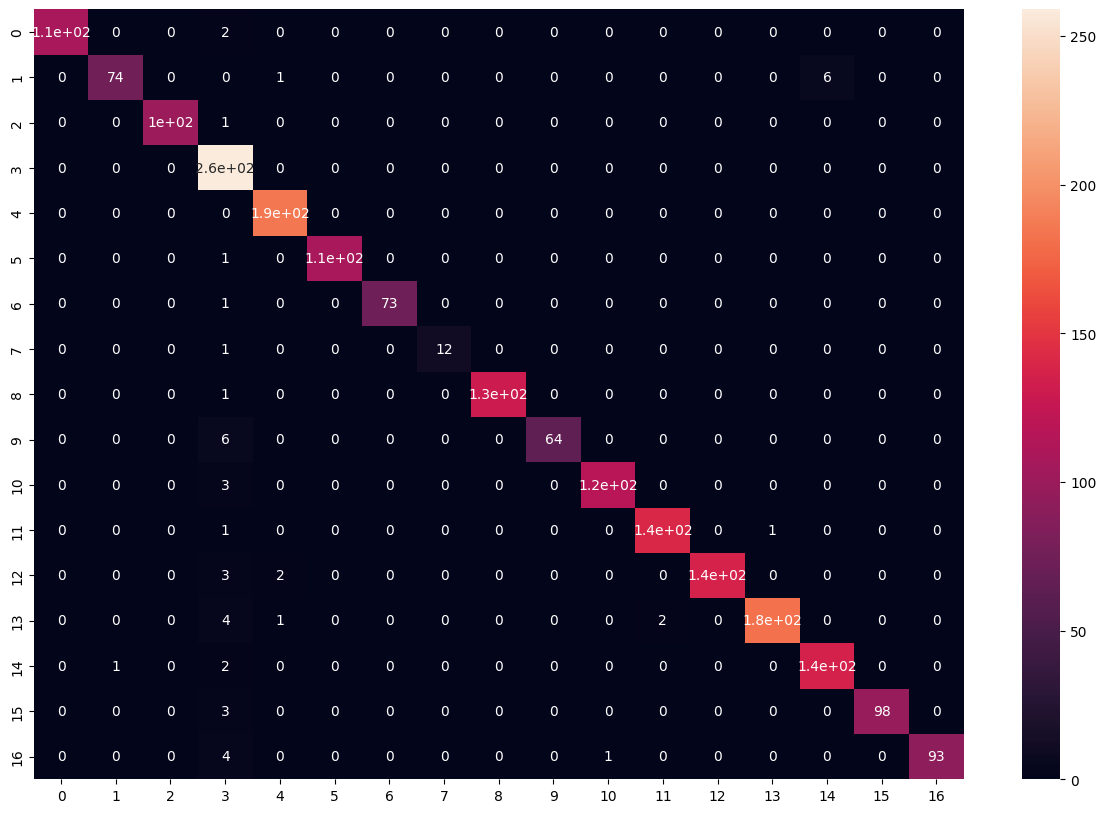

In [19]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Model Saving

In [20]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))